In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings('ignore')

### Load Wind Speed and Spatial Data

In [3]:
datapath = '../../data/raw/kelmarsh/'
figurepath = '../../reports/figures/kelmarsh/'

In [4]:
t1 = pd.read_csv(f'{datapath}turbine1.csv', skiprows=[0, 1, 2, 3, 4, 5, 6, 7, 8], index_col=0, parse_dates=True)
t2 = pd.read_csv(f'{datapath}turbine2.csv', skiprows=[0, 1, 2, 3, 4, 5, 6, 7, 8], index_col=0, parse_dates=True)
t3 = pd.read_csv(f'{datapath}turbine3.csv', skiprows=[0, 1, 2, 3, 4, 5, 6, 7, 8], index_col=0, parse_dates=True)
t4 = pd.read_csv(f'{datapath}turbine4.csv', skiprows=[0, 1, 2, 3, 4, 5, 6, 7, 8], index_col=0, parse_dates=True)
t5 = pd.read_csv(f'{datapath}turbine5.csv', skiprows=[0, 1, 2, 3, 4, 5, 6, 7, 8], index_col=0, parse_dates=True)
t6 = pd.read_csv(f'{datapath}turbine6.csv', skiprows=[0, 1, 2, 3, 4, 5, 6, 7, 8], index_col=0, parse_dates=True)

In [5]:
df = pd.DataFrame({'Turbine 1': t1['Wind speed (m/s)'],
                       'Turbine 2': t2['Wind speed (m/s)'],
                       'Turbine 3': t3['Wind speed (m/s)'],
                       'Turbine 4': t4['Wind speed (m/s)'],
                       'Turbine 5': t5['Wind speed (m/s)'],
                       'Turbine 6': t6['Wind speed (m/s)']})

In [6]:
df

,Turbine 1,Turbine 2,Turbine 3,Turbine 4,Turbine 5,Turbine 6
# Date and time,,,,,,
2022-01-01 00:00:00,6.781222,6.649725,6.526749,6.736784,5.357348,6.133781
2022-01-01 00:10:00,6.936052,7.172483,7.795904,6.162219,5.835054,5.848290
2022-01-01 00:20:00,7.294642,7.092553,7.577127,6.058528,5.845765,5.683789
2022-01-01 00:30:00,8.080467,7.185699,7.774836,6.851648,6.018545,6.080469
2022-01-01 00:40:00,7.021328,7.110317,7.358590,7.567326,7.133427,6.682785
...,...,...,...,...,...,...
2022-12-31 23:10:00,9.518300,9.631914,7.153512,8.585219,8.999645,8.712688
2022-12-31 23:20:00,9.730098,9.295921,7.491813,8.558841,8.894581,9.149686
2022-12-31 23:30:00,9.848731,10.187608,8.186162,9.841343,10.057392,9.571797


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52560 entries, 2022-01-01 00:00:00 to 2022-12-31 23:50:00
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Turbine 1  52006 non-null  float64
 1   Turbine 2  52488 non-null  float64
 2   Turbine 3  52448 non-null  float64
 3   Turbine 4  52327 non-null  float64
 4   Turbine 5  52449 non-null  float64
 5   Turbine 6  52300 non-null  float64
dtypes: float64(6)
memory usage: 2.8 MB


In [8]:
df_static = pd.read_csv(f'{datapath}turbine_static.csv')

In [9]:
df_static

,Wind Farm,Title,Alternative Title,Identity,Manufacturer,Model,Rated power (kW),Hub Height (m),Rotor Diameter (m),Latitude,Longitude,Elevation (m),Country,Commercial Operations Date
0,Kelmarsh,Kelmarsh 1,KWF1,SEN 93420,Senvion,MM92,2050,78.5,92,52.400604,-0.947133,145.598,UK,15/04/2016
1,Kelmarsh,Kelmarsh 2,KWF2,SEN 93421,Senvion,MM92,2050,78.5,92,52.402551,-0.949527,156.577,UK,15/04/2016
2,Kelmarsh,Kelmarsh 3,KWF3,SEN 93422,Senvion,MM92,2050,68.5,92,52.403834,-0.944190,153.477,UK,15/04/2016
3,Kelmarsh,Kelmarsh 4,KWF4,SEN 93423,Senvion,MM92,2050,78.5,92,52.398781,-0.941150,146.313,UK,15/04/2016
4,Kelmarsh,Kelmarsh 5,KWF5,SEN 93424,Senvion,MM92,2050,78.5,92,52.402308,-0.940537,142.901,UK,15/04/2016
5,Kelmarsh,Kelmarsh 6,KWF6,SEN 93425,Senvion,MM92,2050,68.5,92,52.400687,-0.936093,135.039,UK,15/04/2016


In [10]:
df_static.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Wind Farm                   6 non-null      object 
 1   Title                       6 non-null      object 
 2   Alternative Title           6 non-null      object 
 3   Identity                    6 non-null      object 
 4   Manufacturer                6 non-null      object 
 5   Model                       6 non-null      object 
 6   Rated power (kW)            6 non-null      int64  
 7   Hub Height (m)              6 non-null      float64
 8   Rotor Diameter (m)          6 non-null      int64  
 9   Latitude                    6 non-null      float64
 10  Longitude                   6 non-null      float64
 11  Elevation (m)               6 non-null      float64
 12  Country                     6 non-null      object 
 13  Commercial Operations Date  6 non-null 

### Visualize Farm and Turbine Location

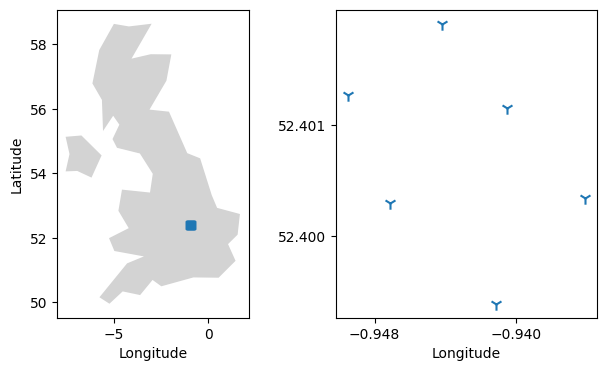

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
countries[countries["name"] == "United Kingdom"].plot(color="lightgrey",ax=ax[0])
# plot points
df_static.plot(x="Longitude", y="Latitude", kind="scatter", s=40, ax=ax[0], marker="s")
df_static.plot(x="Longitude", y="Latitude", kind="scatter", s=80, ax=ax[1], marker="1")
#ax2.xticks(np.arange(0, 1, 1.0))
plt.subplots_adjust(right=.7)
ax[1].set_xticks([-0.948, -0.940])
ax[1].set_yticks([52.40, 52.402], labels=["52.400", "52.401"])
ax[1].set_ylabel('')
#plt.savefig(f'{figurepath}location.png', bbox_inches='tight')
plt.show()

### Visualize Wind Speed Data

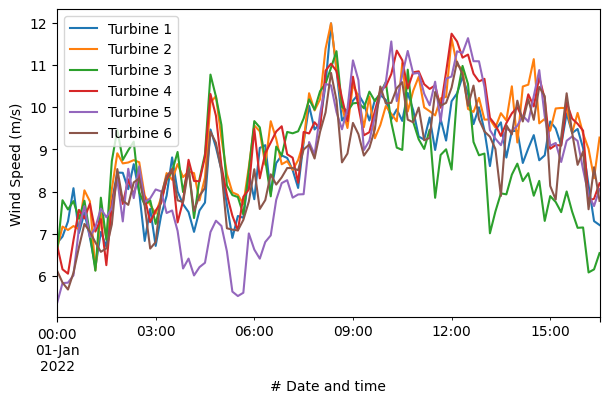

In [12]:
fig, axs = plt.subplots(figsize=(7, 4))
df.iloc[:100,:].plot(ax=axs)
axs.set_ylabel("Wind Speed (m/s)")
#plt.savefig(f'{figurepath}windspeed.png', bbox_inches='tight')
plt.show()

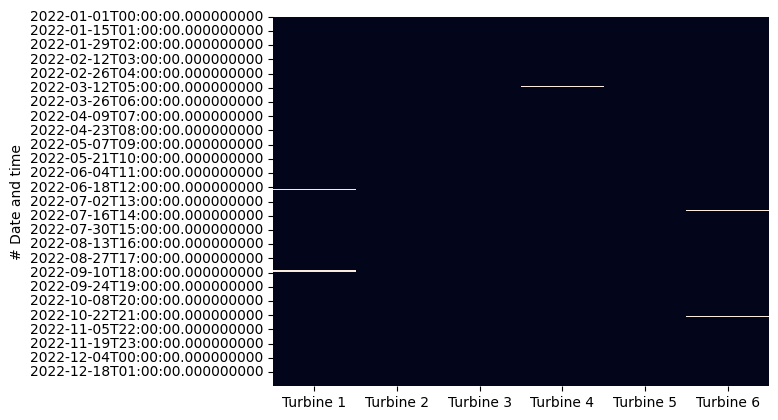

In [13]:
sns.heatmap(df.isnull(), cbar=False)
plt.show()